# Plot corner

For some reason, my corner does not want to plot truths... So plotting it separately here.

In [1]:
import os 
import json
import numpy as np 
import matplotlib.pyplot as plt
import corner

params = {"axes.grid": True,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(params)

# Improved corner kwargs
default_corner_kwargs = dict(bins=40, 
                        smooth=1., 
                        show_titles=False,
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        color="blue",
                        # quantiles=[],
                        # levels=[0.9],
                        plot_density=True, 
                        plot_datapoints=False, 
                        fill_contours=True,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False)

## Data loading

In [2]:
# Fixed names: do not include them in the plotting, as will break corner
fixed_parameter_names = ["luminosity_distance"]

# Load injection dict and samples
injection_dict = np.load("./outdir/injection_dict.npz", allow_pickle=True)
parameter_names = list(injection_dict.keys())
truths = np.array([injection_dict[name] for name in parameter_names if name not in fixed_parameter_names])

# Samples:
samples = np.load("./outdir/results_production.npz", allow_pickle=True)["chains"]

n_chains, n_steps, n_dim = np.shape(samples)
samples = np.reshape(samples, (n_chains * n_steps, n_dim))

## Plotting

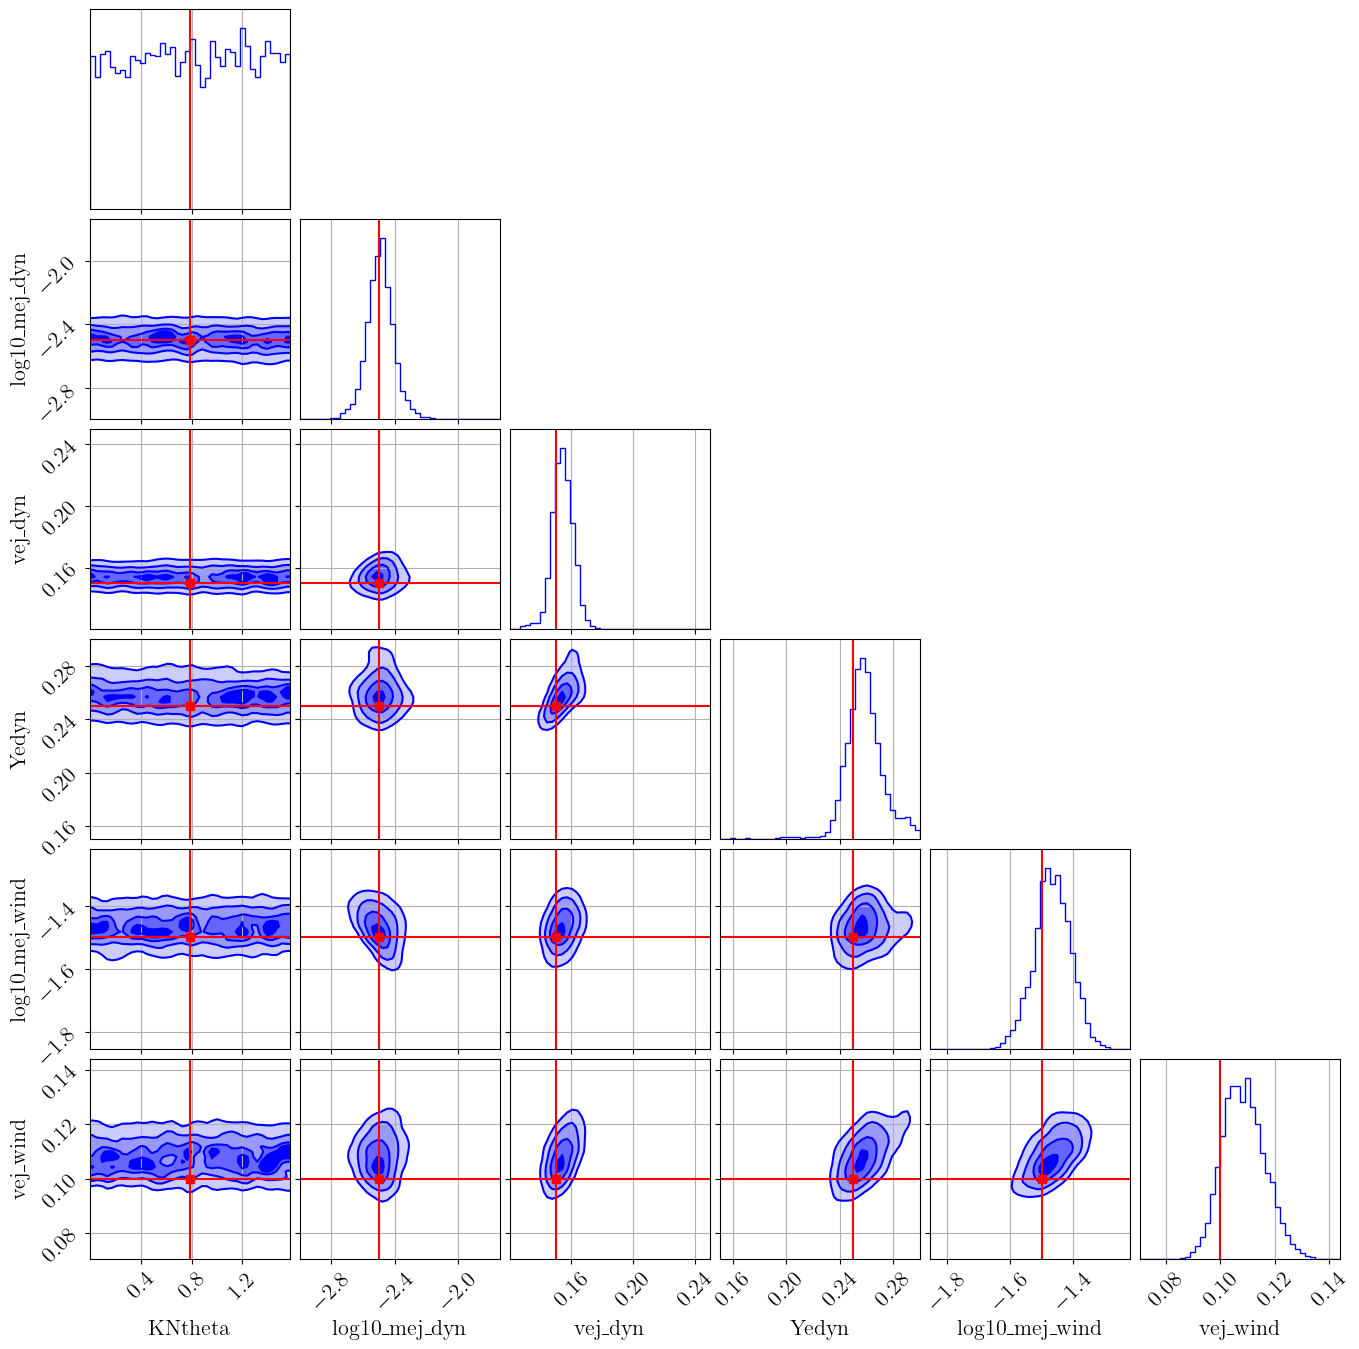

In [3]:
corner.corner(samples, truths=truths, labels=parameter_names, truth_color = "red", **default_corner_kwargs)
plt.savefig('./figures/test_injection_corner.png', bbox_inches='tight')
plt.show()

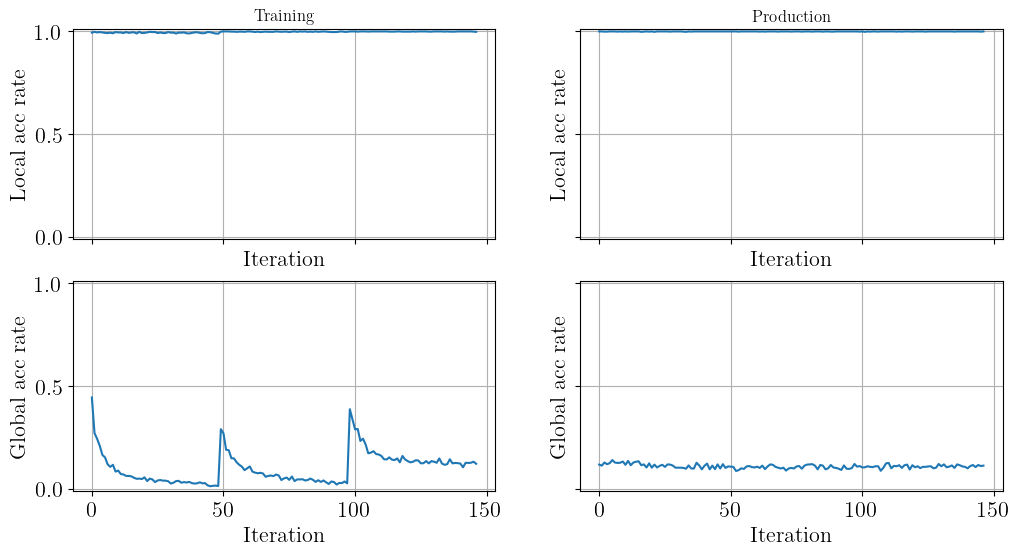

In [4]:
plt.subplots(nrows = 2, ncols = 2, figsize = (12, 6), sharex = True, sharey = True)

local_accs_training = np.load("./outdir/results_training.npz", allow_pickle=True)["local_accs"]
global_accs_training = np.load("./outdir/results_training.npz", allow_pickle=True)["global_accs"]

local_accs_production = np.load("./outdir/results_production.npz", allow_pickle=True)["local_accs"]
global_accs_production = np.load("./outdir/results_production.npz", allow_pickle=True)["global_accs"]

eps = 0.01

plt.subplot(221)
plt.plot(local_accs_training)
plt.xlabel("Iteration")
plt.ylabel("Local acc rate")
plt.ylim(0.0 - eps, 1.0 + eps)
plt.title("Training")

plt.subplot(222)
plt.plot(local_accs_production)
plt.xlabel("Iteration")
plt.ylabel("Local acc rate")
plt.ylim(0.0 - eps, 1.0 + eps)
plt.title("Production")


plt.subplot(223)
plt.plot(global_accs_training)
plt.xlabel("Iteration")
plt.ylabel("Global acc rate")
plt.ylim(0.0 - eps, 1.0 + eps)
# plt.title("Training")

plt.subplot(224)
plt.plot(global_accs_production)
plt.xlabel("Iteration")
plt.ylabel("Global acc rate")
plt.ylim(0.0 - eps, 1.0 + eps)
# plt.title("Production")

plt.show()